## Waste Management using CNN model

In [2]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Importing Necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 
import warnings
warnings.filterwarnings('ignore')


In [4]:
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

In [5]:
# Importing Libraries
from tensorflow.keras.models import  Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [6]:
# Visualization
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [00:07<00:00, 1315.64it/s]


In [7]:
data.shape

(22564, 2)

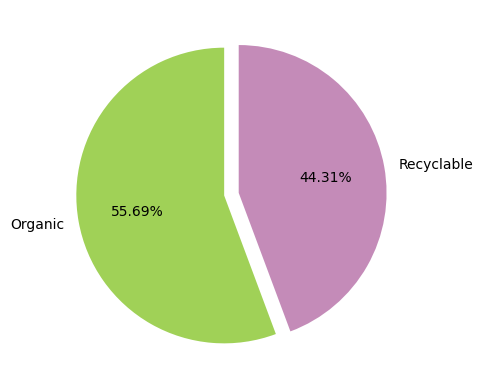

In [8]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%',
        colors = colors, startangle = 90, explode=[0.05, 0.05])
plt.show()


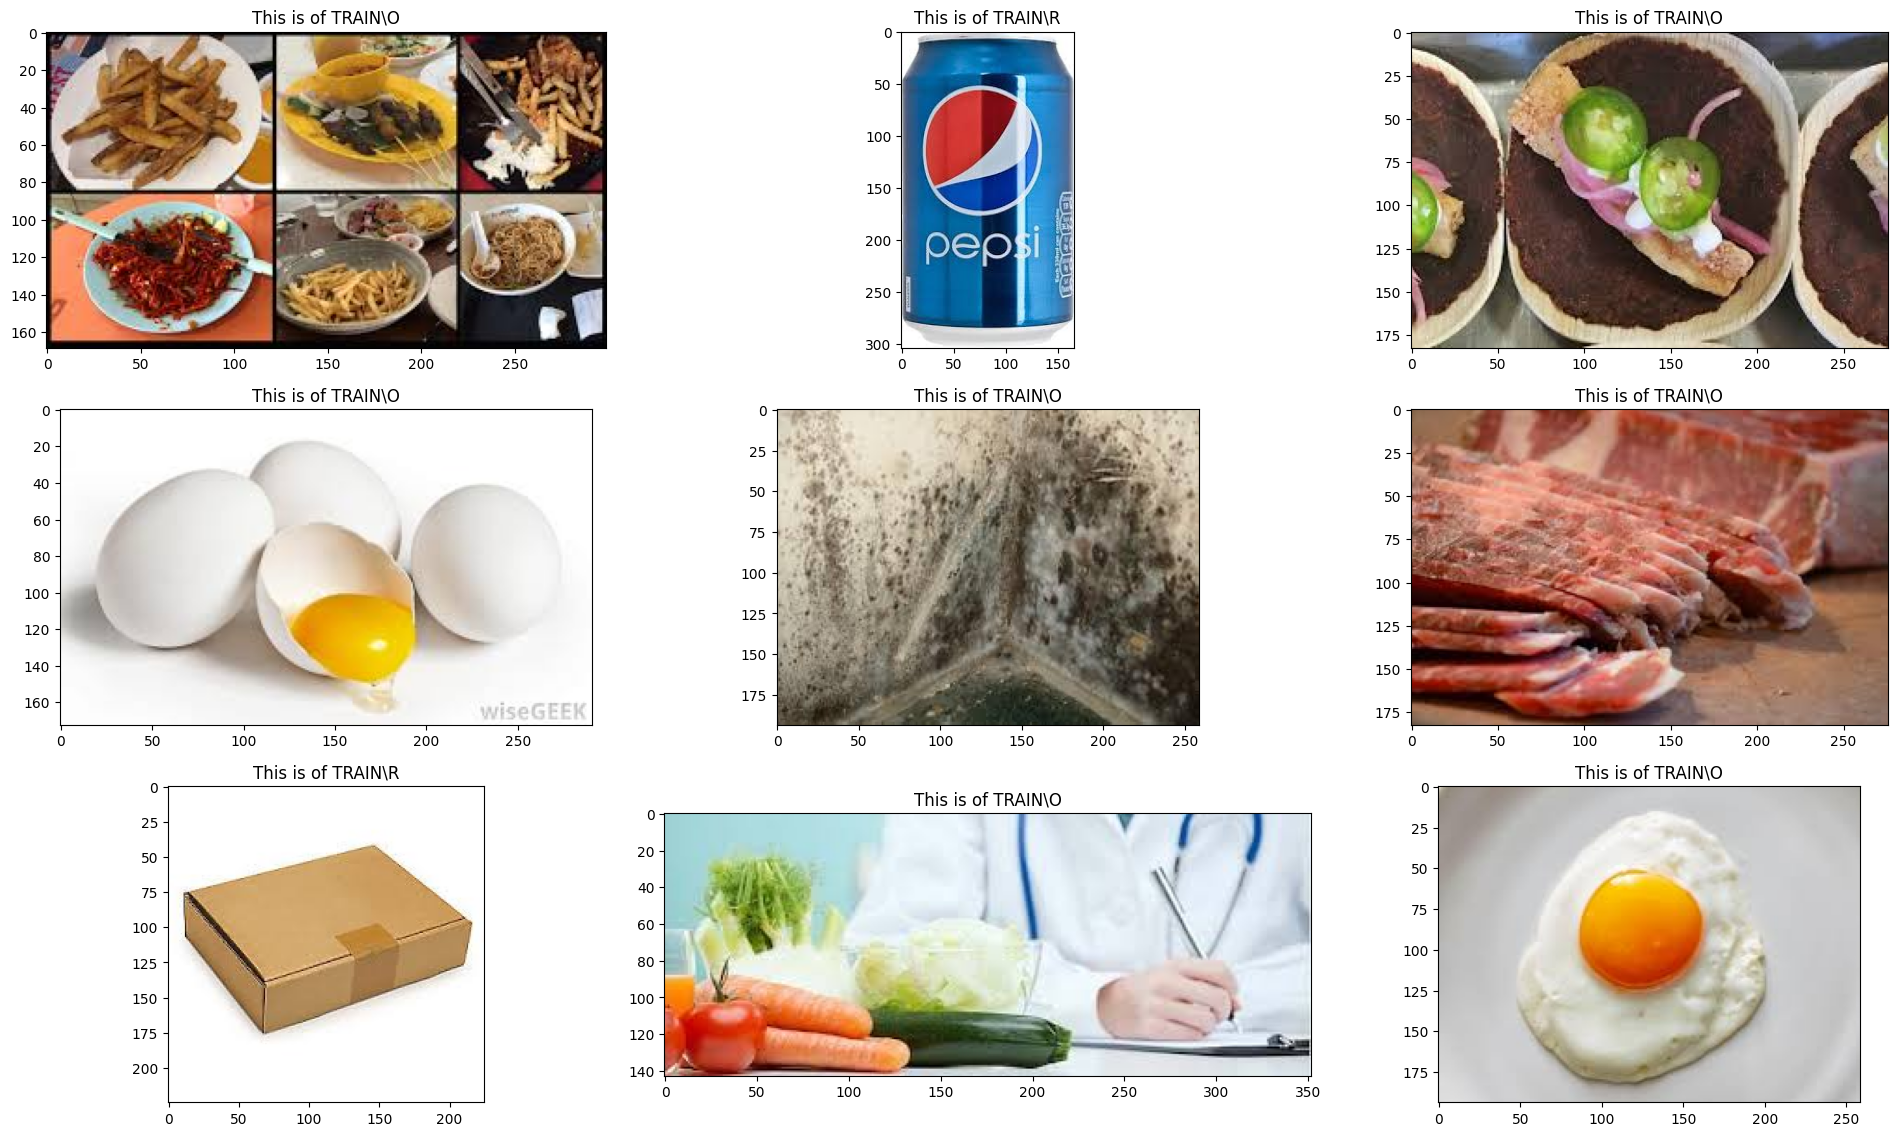

In [9]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index =np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3),input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batchsize = 256

In [11]:
model.summary
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [13]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
  train_path,
  target_size=(224, 224),
  batch_size = 256,
  color_mode = "rgb",
  class_mode = "categorical")

test_generator = train_datagen.flow_from_directory(
  test_path,
  target_size=(224, 224),
  batch_size = 256,
  color_mode = "rgb",
  class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [15]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 454s 5s/step - accuracy: 0.6796 - loss: 0.7040 - val_accuracy: 0.8882 - val_loss: 0.3568
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 331s 4s/step - accuracy: 0.8321 - loss: 0.4116 - val_accuracy: 0.8850 - val_loss: 0.2994
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 329s 4s/step - accuracy: 0.8573 - loss: 0.3571 - val_accuracy: 0.8719 - val_loss: 0.3044
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 330s 4s/step - accuracy: 0.8666 - loss: 0.3383 - val_accuracy: 0.9021 - val_loss: 0.2561
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 331s 4s/step - accuracy: 0.8785 - loss: 0.3031 - val_accuracy: 0.8918 - val_loss: 0.2841
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 327s 4s/step - accuracy: 0.8742 - loss: 0.3026 - val_accuracy: 0.9065 - val_loss: 0.2410
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 329s 4s/step - accuracy: 0.8978 - loss: 0.2594 - val_accuracy: 0.9176 - val_loss: 0.2293
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 330s 4s/step - accuracy: 0.9109 - loss: 0.2354 - val_accuracy: 0.8918 - v